# Aim

General testing for sysid modifications.

In [1]:
# imports

import numpy as np
from scipy import optimize, signal, interpolate, stats
import matplotlib.pyplot as plt
import copy
import itertools
%matplotlib inline
from ao_observe import *

In [2]:
# run everything

pos = make_vibe_data() + make_atm_data()
pos_noisy = pos + np.random.normal(0, measurement_noise, times.size)

In [3]:
psd = get_psd(pos_noisy)
psd = noise_filter(psd)
params, variances = vibe_fit_freq(psd)

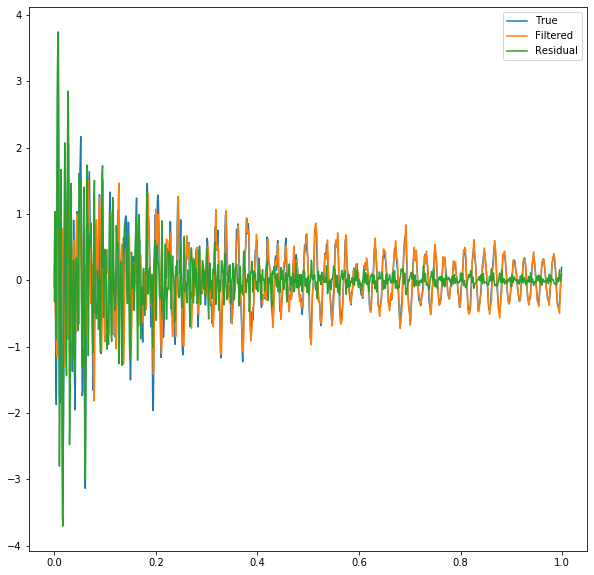

In [5]:
pos_k = kfilter(make_kfilter(params, variances), pos_noisy)
plt.figure(figsize=(10,10))
#plt.plot(times, pos_noisy, label='Measurements')
plt.plot(times, pos, label='True')
plt.plot(times, pos_k, label='Filtered')
plt.plot(times, pos - pos_k, label='Residual')
plt.legend()

In [7]:
def ekf_state_transition(state):
    dt = 1 / f_sampling
    assert not state.size % 4, "state includes N modes with p/v/a/b."
    A = np.zeros((state.size, state.size))
    N = state.size // 4
    for i in range(N):
        p = 4*i
        A[p][p] = 
        A[p][p+1] = 
        A[p][p+2] = 
        A[p][p+3] = 
        A[p+1][p] =
        A[p+1][p+1] = 
        A[p+1][p+2] = 
        A[p+1][p+3] =
        A[p+2][p+2] = 1
        A[p+3][p+3] = 1

def ekf(params, variances, measurements):
    # takes in initial parameters and variances, and measurements
    # constructs and simulates an extended Kalman filter
    

IndentationError: expected an indented block (<ipython-input-7-ebaf09caa7c0>, line 3)